In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# import of the predifined functions in "functions.py"
from functions import calculate_power
from functions import read_inc_power
from functions import read_trans_power

In [14]:
angles_str = ["60", "30","00", "m30", "m60"] # angles of incidence which were simulated (m for minus)

# defining which simulation to process
# simulation="Discs" # for getting the coefficients of the original domain (discs as iterface)
simulation='Tilted_Slits' # for getting the coefficients of the new domain (fins as iterface)

freq_num=10 # number of frequencies which were simulated

results_dataframes = [None] * len(angles_str) # vector for storing dataframe of the calculation for reflected power

# empty dataframes for power calculation  
df_Power_ref = pd.DataFrame()
df_Power_inc = pd.DataFrame()
df_Power_trans = pd.DataFrame()
df_Power_balance = pd.DataFrame()
df_Coefficients = pd.DataFrame()

# for loop over all simulated incidence angles
for index, angle in enumerate(angles_str):
    
    # calcualting power reflected from interface
    [df,Power_ref]=calculate_power(angle,simulation,freq_num)
    results_dataframes[index]=df  
    df_Power_ref[angle]=np.concatenate(Power_ref)
    
    # reading the incoming power
    [Power_inc,frequency]=read_inc_power(angle)
    df_Power_inc['freq_'+angle]=frequency
    df_Power_inc[angle]=Power_inc  
    
    # reading the transmitted power
    [Power_trans]=read_trans_power(angle,simulation)
    df_Power_trans['freq_'+angle]=frequency
    df_Power_trans[angle]=Power_trans

    # check the power balance (for soundhard interface: P_inc=P_refl+P_trans)
    df_Power_balance['balance_'+angle]=df_Power_inc[angle]-df_Power_trans[angle]-df_Power_ref[angle]
    df_Power_balance['Error_in_%_'+angle]=abs(df_Power_balance['balance_'+angle]/df_Power_inc[angle])*100 

    # calculate transmission and reflection coefficients
    df_Coefficients['Trans_coef_'+angle]=df_Power_trans[angle]/df_Power_inc[angle]
    df_Coefficients['Refl_coef_'+angle]=df_Power_ref[angle]/df_Power_inc[angle]


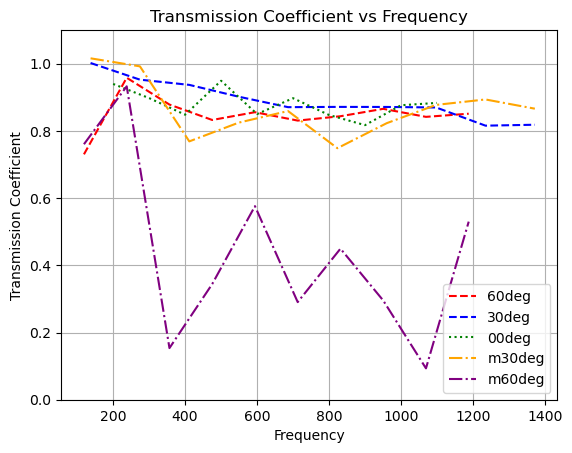

In [15]:
# Plotting Transmission Coefficients
colors = ['red', 'blue', 'green', 'orange', 'purple']
line_styles = ['--', '--', ':', '-.', '-.']
for index, angle in enumerate(angles_str):
    plt.plot(df_Power_trans['freq_'+angle], df_Coefficients['Trans_coef_'+angle],linestyle=line_styles[index], color=colors[index], label=angle+'deg')
plt.xlabel('Frequency')
plt.ylabel('Transmission Coefficient')
plt.ylim(0, 1.1) 
plt.grid(True)
plt.legend()
plt.title('Transmission Coefficient vs Frequency')
plt.show()

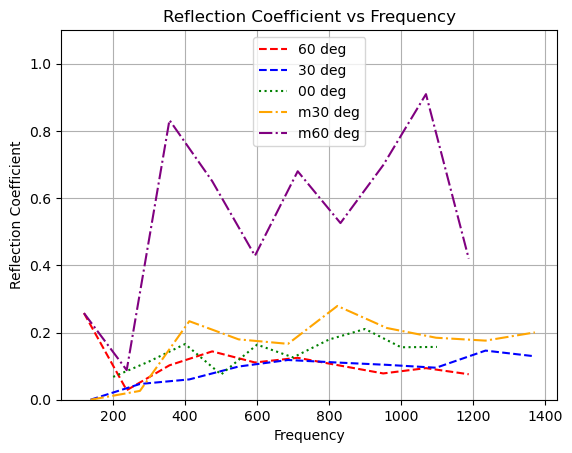

In [16]:
# Plotting Reflection Coefficients
colors = ['red', 'blue', 'green', 'orange', 'purple','black']
line_styles = ['--', '--', ':', '-.', '-.']
for index, angle in enumerate(angles_str):
    plt.plot(df_Power_trans['freq_'+angle], df_Coefficients['Refl_coef_'+angle],linestyle=line_styles[index], color=colors[index], label=angle+' deg')
plt.xlabel('Frequency')
plt.ylabel('Reflection Coefficient')
plt.ylim(0, 1.1)
plt.grid(True)
plt.legend()
plt.title('Reflection Coefficient vs Frequency')
plt.show()

In [17]:
# Display Dataframes for Verification 

display(df_Power_ref)
display(df_Power_inc)
display(df_Power_trans)
display(df_Power_balance)
display(df_Coefficients)

60            30        00           m30       m60
0  0.000658  1.321341e-09  0.000030  2.073327e-09  0.000658
1  0.000018  1.288445e-05  0.000023  7.218280e-06  0.000056
2  0.000029  7.330492e-06  0.000018  2.833928e-05  0.000239
3  0.000023  6.671713e-06  0.000005  1.213028e-05  0.000105
4  0.000012  5.053273e-06  0.000008  7.108253e-06  0.000045
5  0.000009  3.235061e-06  0.000004  8.158917e-06  0.000050
6  0.000006  2.194230e-06  0.000005  4.512408e-06  0.000029
7  0.000003  1.515330e-06  0.000004  2.934551e-06  0.000029
8  0.000003  1.800353e-06  0.000003  2.166262e-06  0.000031
9  0.000002  1.265365e-06  0.000002  1.961640e-06  0.000012

freq_60        60  freq_30        30  freq_00        00  freq_m30  \
0   118.819  0.002552    137.2  0.001104    200.0  0.000449     137.2   
1   237.637  0.000639    274.4  0.000275    300.0  0.000198     274.4   
2   356.456  0.000287    411.6  0.000121    400.0  0.000111     411.6   
3   475.275  0.000161    548.8  0.000068    500.0  0.000070     548.8   
4   594.093  0.000104    686.0  0.000043    600.0  0.000048     686.0   
5   712.912  0.000073    823.2  0.000029    700.0  0.000035     823.2   
6   831.731  0.000054    960.4  0.000021    800.0  0.000026     960.4   
7   950.549  0.000042   1097.6  0.000016    900.0  0.000021    1097.6   
8  1069.370  0.000034   1234.8  0.000012   1000.0  0.000016    1234.8   
9  1188.190  0.000029   1372.0  0.000010   1100.0  0.000013    1372.0   

        m30  freq_m60       m60  
0  0.001104   118.819  0.002552  
1  0.000275   237.637  0.000639  
2  0.000121   356.456  0.000287  
3  0.000068   475.275  0.000161  
4  0.000043   594.093  0.000104  
5  0.000029   712.912  0.000073  
6  0.000021   831.731  0.000054  
7  0.000016   950.549  0.000042  
8  0.000012  1069.370  0.000034  
9  0.000010  1188.190  0.000029

freq_60        60  freq_30        30  freq_00        00  freq_m30  \
0   118.819  0.001864    137.2  0.001106    200.0  0.000422     137.2   
1   237.637  0.000612    274.4  0.000262    300.0  0.000178     274.4   
2   356.456  0.000252    411.6  0.000114    400.0  0.000094     411.6   
3   475.275  0.000134    548.8  0.000061    500.0  0.000067     548.8   
4   594.093  0.000089    686.0  0.000037    600.0  0.000041     686.0   
5   712.912  0.000061    823.2  0.000025    700.0  0.000031     823.2   
6   831.731  0.000046    960.4  0.000018    800.0  0.000022     960.4   
7   950.549  0.000036   1097.6  0.000014    900.0  0.000017    1097.6   
8  1069.370  0.000029   1234.8  0.000010   1000.0  0.000014    1234.8   
9  1188.190  0.000024   1372.0  0.000008   1100.0  0.000012    1372.0   

        m30  freq_m60       m60  
0  0.001122   118.819  0.001941  
1  0.000273   237.637  0.000596  
2  0.000093   356.456  0.000044  
3  0.000056   475.275  0.000056  
4  0.000037   594.093  0.000060  
5  0.000022   712.912  0.000021  
6  0.000017   831.731  0.000024  
7  0.000014   950.549  0.000012  
8  0.000011  1069.370  0.000003  
9  0.000008  1188.190  0.000015

balance_60  Error_in_%_60    balance_30  Error_in_%_30    balance_00  \
0    0.000030       1.186312 -2.395516e-06       0.216984 -3.468353e-06   
1    0.000009       1.338932  1.564011e-07       0.056884 -2.289205e-06   
2    0.000005       1.916189  3.065287e-07       0.252770 -1.550867e-06   
3    0.000004       2.355722 -4.358617e-08       0.064528 -1.710858e-06   
4    0.000003       3.341543  4.720634e-07       1.104483 -6.804654e-07   
5    0.000003       4.446738  5.215487e-07       1.784015 -8.166981e-07   
6    0.000003       5.491210  5.251447e-07       2.484672 -7.026806e-07   
7    0.000002       5.601559  5.559471e-07       3.494633 -5.701651e-07   
8    0.000002       6.409852  4.700340e-07       3.816611 -5.342472e-07   
9    0.000002       7.297702  5.127364e-07       5.236356 -5.393413e-07   

   Error_in_%_00   balance_m30  Error_in_%_m30   balance_m60  Error_in_%_m60  
0       0.772930 -1.773980e-05        1.606858 -4.651930e-05        1.822734  
1       1.154023 -5.065495e-06        1.842353 -1.327702e-05        2.078135  
2       1.399665 -3.107563e-07        0.256256  4.012850e-06        1.399570  
3       2.435782 -2.837477e-07        0.420078  8.485206e-07        0.525495  
4       1.409820 -1.088620e-06        2.547035 -4.833402e-07        0.465188  
5       2.333414 -8.087404e-07        2.766386  2.170086e-06        2.956972  
6       2.658335 -7.734992e-07        3.659737  1.343435e-06        2.466123  
7       2.773365 -9.849212e-07        6.191125  2.704936e-07        0.642806  
8       3.260779 -8.563612e-07        6.953534 -9.799783e-08        0.287618  
9       4.054148 -6.513558e-07        6.652015  1.422735e-06        4.990238

Trans_coef_60  Refl_coef_60  Trans_coef_30  Refl_coef_30  Trans_coef_00  \
0       0.730330      0.257807       1.002169      0.000001       0.939777   
1       0.958265      0.028345       0.952570      0.046862       0.897667   
2       0.878429      0.102409       0.937023      0.060449       0.848253   
3       0.832582      0.143861       0.901873      0.098772       0.949299   
4       0.855745      0.110839       0.870724      0.118231       0.850217   
5       0.830757      0.124776       0.871501      0.110659       0.897418   
6       0.843713      0.101375       0.871335      0.103818       0.847375   
7       0.865751      0.078234       0.869801      0.095252       0.817170   
8       0.841859      0.094042       0.815648      0.146186       0.876480   
9       0.851220      0.075803       0.818410      0.129226       0.883385   

   Refl_coef_00  Trans_coef_m30  Refl_coef_m30  Trans_coef_m60  Refl_coef_m60  
0      0.067952        1.016067       0.000002        0.760413       0.257815  
1      0.113873        0.992170       0.026253        0.932759       0.088023  
2      0.165744        0.768871       0.233692        0.153683       0.832321  
3      0.075059        0.824617       0.179584        0.344271       0.650474  
4      0.163881        0.859159       0.166311        0.576115       0.428537  
5      0.125916        0.748579       0.279085        0.290505       0.679925  
6      0.179208        0.823097       0.213500        0.449625       0.525713  
7      0.210564        0.877448       0.184463        0.295397       0.698175  
8      0.156127        0.893638       0.175897        0.093388       0.909489  
9      0.157156        0.866186       0.200334        0.530004       0.420094